Mean Squared Error: 21973884035.150337


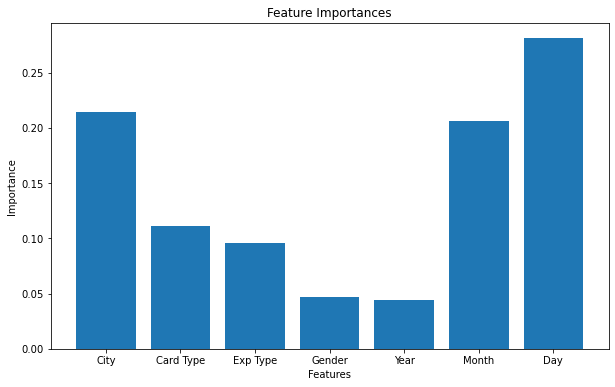

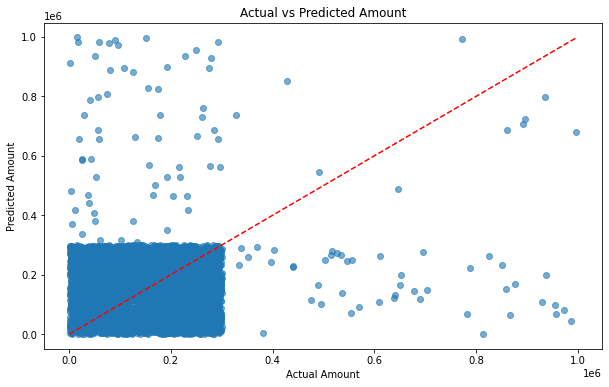

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('dataset.csv').drop('index', axis=1)

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop original Date column
data = data.drop(columns=['Date'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['City', 'Card Type', 'Exp Type', 'Gender']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features and target variable
X = data.drop(columns=['Amount'])
y = data['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 111504.746082006
R-squared: -1.0980084051826298


In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print 5 actual values and their predicted values
print("Actual values vs Predicted values:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Mean Squared Error: 21973884035.150337
Actual values vs Predicted values:
Actual: 110246, Predicted: 86177.0
Actual: 146706, Predicted: 31522.0
Actual: 33141, Predicted: 285203.0
Actual: 81374, Predicted: 298276.0
Actual: 186422, Predicted: 182010.0
